# CO2 PPM - Trends in Atmospheric Carbon Dioxide
#### Members: Manuel E. Mendez Jr., Kiyoharu Sarmiento, Rijel S. Tayag


#### Dataset URL = https://datahub.io/core/co2-ppm?fbclid=IwZXh0bgNhZW0CMTEAAR3M_1xY5QFmS8QgeqfnxP3rYNL4BKyOjRoduVYio98z-1xYSdvv9VAlxYA_aem_ClL6cpumh_1hEZh8l9tYrg

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load and assign the dataset

In [2]:
CO2_PPM = './dataset/CO2.csv'

# Load the dataset
df = pd.read_csv(CO2_PPM)

### Display the first few rows of the dataset

In [3]:
print(df.head())

      Date  Decimal Date  Average  Interpolated  Trend  Number of Days  \
0  1958-03     1958.2027   315.71        314.44     -1           -9.99   
1  1958-04     1958.2877   317.45        315.16     -1           -9.99   
2  1958-05     1958.3699   317.51        314.69     -1           -9.99   
3  1958-06     1958.4548   317.27        315.15     -1           -9.99   
4  1958-07     1958.5370   315.87        315.20     -1           -9.99   

  __parsed_extra  
0        [-0.99]  
1        [-0.99]  
2        [-0.99]  
3        [-0.99]  
4        [-0.99]  


### Data preprocessing

In [4]:
# Drop rows with missing rows
df = df.dropna()

# Convert 'Date' to datetime and extract year, month, day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

### Data visualization

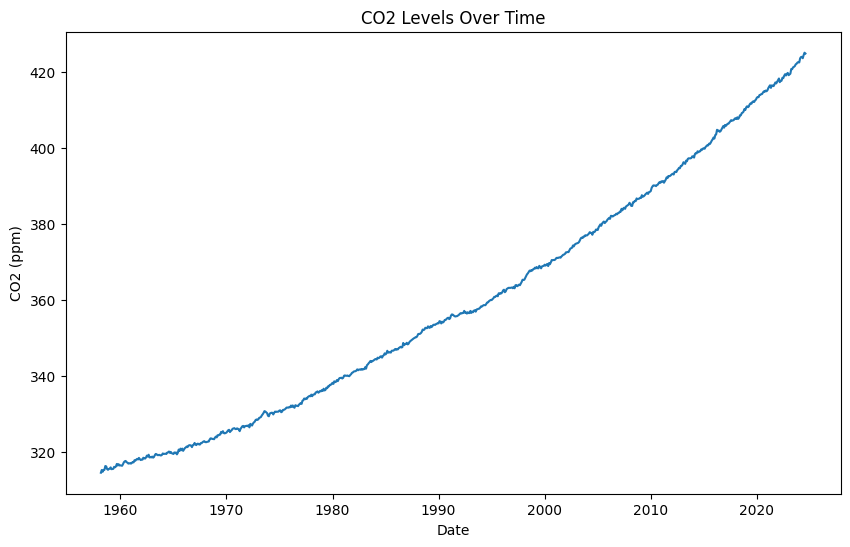

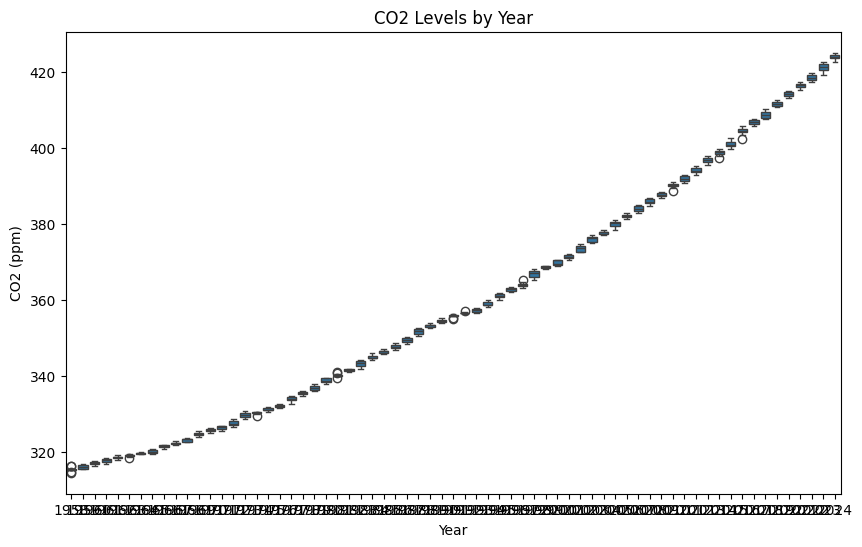

In [8]:
# Line plot of CO2 levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Interpolated', data=df)
plt.title('CO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.show()

# Box plot of CO2 levels by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Interpolated', data=df)
plt.title('CO2 Levels by Year')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

### Model development

In [10]:
# Use 'Year' and 'Month' as features and 'Interpolated' as the target
X = df[['Year', 'Month']]
y = df['Interpolated']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Decision Tree
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Random Forest
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Gradient Boosting
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Model evaluation

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

models = [model_lr, model_dt, model_rf, model_gb]
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")

Linear Regression - MAE: 3.8016224171087822, MSE: 20.618912532179273, R2: 0.9807801108026832
Decision Tree - MAE: 0.2520000000000021, MSE: 0.10713000000000213, R2: 0.9999001389269926
Random Forest - MAE: 0.23105562500005128, MSE: 0.08664885581253576, R2: 0.9999192303956287
Gradient Boosting - MAE: 0.2446623666565287, MSE: 0.1011929502406693, R2: 0.9999056731392532
